In [1]:
from coffea import hist
import math

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
import numpy as np
import random
plt.style.use(hep.style.CMS)

import awkward as ak

from matplotlib import colors
POPTS={'norm':colors.LogNorm(vmin=1,vmax=200)}

In [2]:
from data import getData, repackage
ldmx_dict = getData(chunks=True, fnames="/Users/chloeg/Desktop/Work/Fermilab2021/HistData/kshort_pn_4GeV_Jun13_ntuple/*.root")

In [3]:
def extend_array(arr, new_attr, new_attr_name):
    members={n:arr[n] for n in arr.fields}
    members[new_attr_name] = new_attr
    return ak.zip(members)

def add_angle(arr,br=['px','py','pz','e'],name="theta"):
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)

    part =  ak.zip({"x": arr.px,
                    "y": arr.py,
                    "z": arr.pz,
                    "t": arr.e,
                    },
                    with_name="LorentzVector")
    arr = extend_array(arr, part.theta, name)
    return arr

def get_vector(arr):
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)

    part =  ak.zip({"x": arr.px,
                    "y": arr.py,
                    "z": arr.pz,
                    "t": arr.e,
                    },
                    with_name="LorentzVector")
    return part

def flat(x,axis=None): # for now must cast while waiting for coffea to catch up
    try:
        return ak.to_numpy(ak.flatten(x,axis=axis)) 
    except:
        return x

In [4]:
def pz_smear(pz):
    pz_array = []
    for part in pz:
        for element in part:
            if element <= 50:
                pz_perc = random.gauss(1,0.0404);
            elif element <= 100: 
                pz_perc = random.gauss(1,0.0410);
            elif element <= 250: 
                pz_perc = random.gauss(1,0.0415);
            elif element <= 500: 
                pz_perc = random.gauss(1,0.0420);
            elif element <= 1000: 
                pz_perc = random.gauss(1,0.0435);
            elif element <= 2000:  
                pz_perc = random.gauss(1,0.0477);
            elif element <= 3000:  
                pz_perc = random.gauss(1,0.0523);
            elif element <= 4000:  
                pz_perc = random.gauss(1,0.0573);            
            else:    
                pz_perc = random.gauss(1,0.06);
            pz_array=np.append(pz_array, [pz_perc])
    return (pz_array)

def px1_smear(p):
    px_array = []
    for part in p:
        for element in part:
            if element <= 100:
                px_uncer = random.gauss(0,3.00);
            elif element <= 400: 
                px_uncer = random.gauss(0,3.20);
            elif element <= 500: 
                px_uncer = random.gauss(0,3.20);
            elif element <= 1000: 
                px_uncer = random.gauss(0,3.40);
            elif element <= 1300: 
                px_uncer = random.gauss(0,3.50);
            elif element <= 2000:  
                px_uncer = random.gauss(0,3.85);           
            else:    
                px_uncer = random.gauss(0,3.85);
            px_array=np.append(px_array, [px_uncer])
    return (px_array)

def px2_smear(p):
    px_array = []
    for part in p:
        for element in part:
            if element <= 100:
                px_uncer = random.gauss(0,3.00);
            elif element <= 400: 
                px_uncer = random.gauss(0,3.20);
            elif element <= 500: 
                px_uncer = random.gauss(0,3.20);
            elif element <= 1000: 
                px_uncer = random.gauss(0,3.40);
            elif element <= 1300: 
                px_uncer = random.gauss(0,3.50);
            elif element <= 2000:  
                px_uncer = random.gauss(0,3.85);           
            else:    
                px_uncer = random.gauss(0,3.85);
            px_array=np.append(px_array, [px_uncer])
    return (px_array)

def py1_smear(p):
    py_array = []
    for part in p:
        for element in part:
            if element <= 100:
                py_uncer = random.gauss(0,3.75);
            elif element <= 350: 
                py_uncer = random.gauss(0,3.80);
            elif element <= 500: 
                py_uncer = random.gauss(0,4.20);
            elif element <= 1000: 
                py_uncer = random.gauss(0,4.80);
            elif element <= 1200: 
                py_uncer = random.gauss(0,4.98);
            elif element <= 2000:  
                py_uncer = random.gauss(0,3.85);           
            else:    
                py_uncer = random.gauss(0,5.50);
            py_array=np.append(py_array, [py_uncer])
    return (py_array)

def py2_smear(p):
    py_array = []
    for part in p:
        for element in part:
            if element <= 100:
                py_uncer = random.gauss(0,3.75);
            elif element <= 350: 
                py_uncer = random.gauss(0,3.80);
            elif element <= 500: 
                py_uncer = random.gauss(0,4.20);
            elif element <= 1000: 
                py_uncer = random.gauss(0,4.80);
            elif element <= 1200: 
                py_uncer = random.gauss(0,4.98);
            elif element <= 2000:  
                py_uncer = random.gauss(0,3.85);           
            else:    
                py_uncer = random.gauss(0,5.50);
            py_array=np.append(py_array, [py_uncer])
    return (py_array)



In [5]:
hists = {}
hists["sim_pion_e1"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"$\pi^\pm$ Kinetic Energy [MeV]", 80, 0, 1400), 
                            )  
hists["sim_pion_e2"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"$\pi^\pm$ Kinetic Energy [MeV]", 80, 0, 1400), 
                            )  
hists["sim_pion_e3"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"$\pi^\pm$ Kinetic Energy [MeV]", 80, 0, 1400), 
                            )
hists["sim_pion_e4"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"$\pi^\pm$ Kinetic Energy [MeV]", 80, 0, 1400), 
                            )
hists["sim_pion_e5"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"$\pi^\pm$ Kinetic Energy [MeV]", 80, 0, 1400), 
                            )

hists["sim_pion_mass1"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"Reconstructed $K_s$ Mass [MeV]", 80, 400, 600), 
                            )  
hists["sim_pion_mass2"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"Reconstructed $K_s$ Mass [MeV]", 80, 400, 600), 
                            )  
hists["sim_pion_mass3"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"Reconstructed $K_s$ Mass [MeV]", 80, 400, 600), 
                            ) 
hists["sim_pion_mass4"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"Reconstructed $K_s$ Mass [MeV]", 80, 400, 600), 
                            ) 
hists["sim_pion_mass5"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"Reconstructed $K_s$ Mass [MeV]", 80, 400, 600), 
                            ) 
hists["sim_kaone_hist"] = hist.Hist("Sim Pions",     
                                hist.Bin("k", r"Reconstructed $K_s$ Kinetic Energy [MeV]", 40, 0, 3500),
                                hist.Bin("e", r"Electron Energy [MeV]", 40, 0, 1500),
                            )


In [6]:
def ProcessChunk(chunk, hists):
    ldmx_events = repackage(chunk)
    
    #constant definitions
    kshort_pdgid = 310
    chargedpion_pdgid = 211
    pion_mass = 139
    kaon_mass = 497.648
 
    #select events
    sim_kaon = ldmx_events['Sim_Kaon']
    sim_kaon_dau1 = ldmx_events['Sim_Kaon_dau1']
    sim_kaon_dau2 = ldmx_events['Sim_Kaon_dau2']
    
    #sim kaon masks
    k_mask = (abs(sim_kaon.pdgID)==kshort_pdgid)
    kshort_mask = (abs(sim_kaon_dau2.mompdgID)==kshort_pdgid)
        #same as kshort_pi_mask
    pidau_mask = (abs(sim_kaon_dau2.pdgID)==chargedpion_pdgid)

    #define vectors
    pi1 = get_vector(sim_kaon_dau1[pidau_mask & kshort_mask])
    pi2 = get_vector(sim_kaon_dau2[pidau_mask & kshort_mask])
    pisum = (pi1 + pi2)
    
    #define vector kinematics
    new_pz1 = pz_smear(pi1.p)*flat(pi1.pz)
    new_pz2 = pz_smear(pi2.p)*flat(pi2.pz)
    new_px1 = px1_smear(pi1.p)+flat(pi1.px)
    new_px2 = px2_smear(pi2.p)+flat(pi2.px)
    new_py1 = py1_smear(pi1.p)+flat(pi1.py)
    new_py2 = py2_smear(pi2.p)+flat(pi2.py)
    
    new_psq1 = flat(pi1.px)**2+flat(pi1.py)**2+new_pz1**2
    new_psq2 = flat(pi2.px)**2+flat(pi2.py)**2+new_pz2**2
    
    #theta masks
    theta_mask1 = ((40*math.pi/180) <= (flat(pi2.theta)))
    theta_mask2 = ((40*math.pi/180) <= (pi2.theta))
    
    #create smeared events
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)
    pi1_track_smeared =  ak.zip({"x": new_px1,
                    "y": new_py1,
                    "z": new_pz1,
                    "t": (np.sqrt(new_psq1+flat(pi1.mass)**2)),
                    },
                    with_name="LorentzVector")
    pi2_track_smeared =  ak.zip({"x": new_px2,
                    "y": new_py2,
                    "z": new_pz2,
                    "t": (np.sqrt(new_psq2+flat(pi2.mass)**2)),
                    },
                    with_name="LorentzVector")
    pisum_track_smeared =(pi1_track_smeared+pi2_track_smeared)
    pisum_smeared_e_append = np.append(flat(pi1_track_smeared[theta_mask1].t), flat(pi2_track_smeared[theta_mask1].t))
    
    #percent masks for larger than 40 degrees
    mask_15 = (-4.0*flat(sim_kaon_dau2[theta_mask2 & pidau_mask & kshort_mask].mome-kaon_mass)+2800) <= flat(sim_kaon_dau2[theta_mask2 & pidau_mask & kshort_mask].electrone)
    mask_30 = (-4.0*flat(sim_kaon_dau2[theta_mask2 & pidau_mask & kshort_mask].mome-kaon_mass)+2040) <= flat(sim_kaon_dau2[theta_mask2 & pidau_mask & kshort_mask].electrone)
    mask_50 = (-4.0*flat(sim_kaon_dau2[theta_mask2 & pidau_mask & kshort_mask].mome-kaon_mass)+1500) <= flat(sim_kaon_dau2[theta_mask2 & pidau_mask & kshort_mask].electrone)
    mask_75 = (-4.0*flat(sim_kaon_dau2[theta_mask2 & pidau_mask & kshort_mask].mome-kaon_mass)+960) <= flat(sim_kaon_dau2[theta_mask2 & pidau_mask & kshort_mask].electrone)
    
    #percent masks for less than 40 degrees  
    #mask_15 = (-1.5*flat(sim_kaon_dau2[theta_mask2 & pidau_mask & kshort_mask].mome-kaon_mass)+3500) <= flat(sim_kaon_dau2[theta_mask2 & pidau_mask & kshort_mask].electrone)
    #mask_30 = (-1.5*flat(sim_kaon_dau2[theta_mask2 & pidau_mask & kshort_mask].mome-kaon_mass)+2500) <= flat(sim_kaon_dau2[theta_mask2 & pidau_mask & kshort_mask].electrone)
    #mask_50 = (-1.5*flat(sim_kaon_dau2[theta_mask2 & pidau_mask & kshort_mask].mome-kaon_mass)+1940) <= flat(sim_kaon_dau2[theta_mask2 & pidau_mask & kshort_mask].electrone)
    #mask_75 = (-1.5*flat(sim_kaon_dau2[theta_mask2 & pidau_mask & kshort_mask].mome-kaon_mass)+1300) <= flat(sim_kaon_dau2[theta_mask2 & pidau_mask & kshort_mask].electrone)


    acceptance_d = flat(flat(pisum_track_smeared[theta_mask1][mask_30].mass).shape)
    acceptance_n = flat(flat(pisum_track_smeared[theta_mask1].mass).shape)
    acceptance = flat(acceptance_d / acceptance_n)
    
    #fill histograms
    hists["sim_kaone_hist"].fill(
                                 k = flat(pisum_track_smeared[theta_mask1].t) - kaon_mass,
                                 e = flat(sim_kaon_dau2[kshort_mask][theta_mask2].electrone),
                                )    
    
    hists["sim_pion_mass1"].fill(
                                 e=flat(pisum_track_smeared[theta_mask1].mass),
                                )
    hists["sim_pion_mass2"].fill(
                                 e=flat(pisum_track_smeared[theta_mask1][mask_15].mass),
                                )
    hists["sim_pion_mass3"].fill(
                                 e=flat(pisum_track_smeared[theta_mask1][mask_30].mass),
                                )
    hists["sim_pion_mass4"].fill(
                                 e=flat(pisum_track_smeared[theta_mask1][mask_50].mass),
                                )
    hists["sim_pion_mass5"].fill(
                                 e=flat(pisum_track_smeared[theta_mask1][mask_75].mass),
                                )
    hists["sim_pion_e1"].fill(
                                e=flat(pisum_smeared_e_append)-pion_mass,
                                ) 
    pisum_smeared_e_append_15 = np.append(flat(pi1_track_smeared[theta_mask1][mask_15].t), flat(pi2_track_smeared[theta_mask1][mask_15].t))
    hists["sim_pion_e2"].fill(
                                e=flat(pisum_smeared_e_append_15)-pion_mass,
                                ) 
    pisum_smeared_e_append_30 = np.append(flat(pi1_track_smeared[theta_mask1][mask_30].t), flat(pi2_track_smeared[theta_mask1][mask_30].t))
    hists["sim_pion_e3"].fill(
                                e=flat(pisum_smeared_e_append_30)-pion_mass,
                                ) 
    pisum_smeared_e_append_50 = np.append(flat(pi1_track_smeared[theta_mask1][mask_50].t), flat(pi2_track_smeared[theta_mask1][mask_50].t))
    hists["sim_pion_e4"].fill(
                                e=flat(pisum_smeared_e_append_50)-pion_mass,
                                ) 
    pisum_smeared_e_append_75 = np.append(flat(pi1_track_smeared[theta_mask1][mask_75].t), flat(pi2_track_smeared[theta_mask1][mask_75].t))
    hists["sim_pion_e5"].fill(
                                e=flat(pisum_smeared_e_append_75)-pion_mass,
                                ) 
    return acceptance

In [7]:
nchunk = 0
percent = 0
for chunk in ldmx_dict:
    nchunk += 1
    returna = ProcessChunk(chunk, hists)
    percent += 100*returna[0]
    print('process', nchunk) 
    print('percent', percent/nchunk)

process 1
percent 35.65217391304348
process 2
percent 33.064182194616976
process 3
percent 30.993405413695267
process 4
percent 31.79768563921882
process 5
percent 30.62333369656024
process 6
percent 28.707850544234983
process 7
percent 28.90405772548829
process 8
percent 30.21231035232194
process 9
percent 29.92052107945858
process 10
percent 30.424403930862315
process 11
percent 30.63660545438894
process 12
percent 30.67255176361057
process 13
percent 30.651586243332833
process 14
percent 29.903864814418494
process 15
percent 29.986776559031036
process 16
percent 29.790843764832335
process 17
percent 29.523883852343683
process 18
percent 29.484421378437585
process 19
percent 29.465970688399633
process 20
percent 29.88342845650066
process 21
percent 29.76319331885957
process 22
percent 29.4648663498205
process 23
percent 29.644939872743485
process 24
percent 29.619411464067344
process 25
percent 29.48726658445202
process 26
percent 29.74508233852987
process 27
percent 29.8074337863091

<Hist (e) instance at 0x12b1482e0>


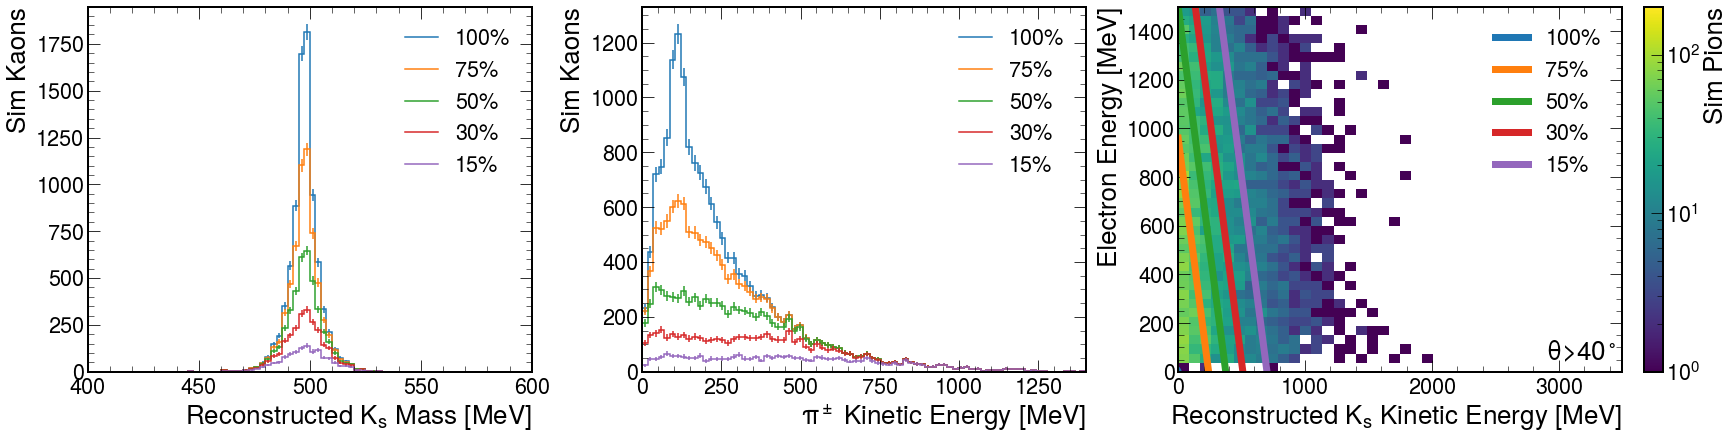

In [8]:
print(hists["sim_pion_mass1"])
fig, ax = plt.subplots(1,3,figsize=(24,6), constrained_layout=True)

 #this is 100% of the data with theta cut
hist.plot1d(hists["sim_pion_mass1"],ax=ax[0],clear=False);
hist.plot1d(hists["sim_pion_mass5"],ax=ax[0],clear=False);
hist.plot1d(hists["sim_pion_mass4"],ax=ax[0],clear=False);
hist.plot1d(hists["sim_pion_mass3"],ax=ax[0],clear=False);
hist.plot1d(hists["sim_pion_mass2"],ax=ax[0],clear=False);
leg = ax[0].legend([r'100%', r'75%', r'50%', r'30%', r'15%' ])


hist.plot1d(hists["sim_pion_e1"],ax=ax[1],clear=False);
hist.plot1d(hists["sim_pion_e5"],ax=ax[1],clear=False);
hist.plot1d(hists["sim_pion_e4"],ax=ax[1],clear=False);
hist.plot1d(hists["sim_pion_e3"],ax=ax[1],clear=False);
hist.plot1d(hists["sim_pion_e2"],ax=ax[1],clear=False);
leg = ax[1].legend([r'100%', r'75%', r'50%', r'30%', r'15%' ])



hist.plot2d(hists["sim_kaone_hist"], xaxis='k', ax=ax[2], patch_opts=POPTS);
ax[2].text(2900, 50,r'$\theta$>40$^\circ$', color='black')

x = np.arange(0, 3250, 1)
lineouter = -1* x + 0
# for theta greater than 40
line15 = -4.0* x + 2800
line30 = -4.0* x + 2040
line50 = -4.0* x + 1500
line75 = -4.0* x + 960

# for theta less than 40
#line15 = -1.5* x + 3500
#line30 = -1.5* x + 2500
#line50 = -1.5* x + 1940
#line75 = -1.5* x + 1350

ax[2].plot(x, lineouter, '-', color='C0', linewidth=7.0)
ax[2].plot(x, line75, '-', color='C1', linewidth=7.0)
ax[2].plot(x, line50, '-', color='C2', linewidth=7.0)
ax[2].plot(x, line30, '-', color='C3', linewidth=7.0)
ax[2].plot(x, line15, '-', color='C4', linewidth=7.0)
leg = ax[2].legend([r'100%', r'75%', r'50%', r'30%', r'15%' ])
     

<Hist (k,e) instance at 0x10799f6a0>


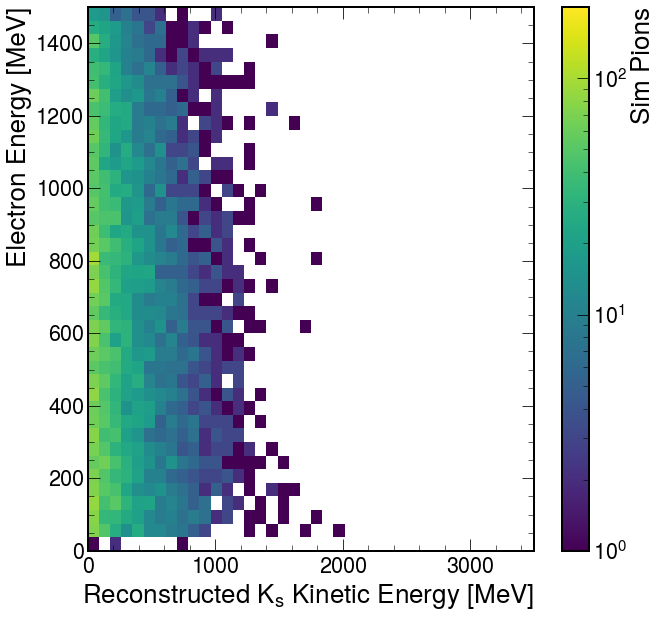

In [9]:
print(hists["sim_kaone_hist"])
fig, ax = plt.subplots()
hist.plot2d(hists["sim_kaone_hist"], xaxis='k', ax=ax, patch_opts=POPTS);